<!--HEADER-->
*Notas de aula de Modelagem Matemática - 2020/2 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2020p2/notas_de_aula/22.00-EDP_e_diferencas_finitas.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/julia-env-for-binder?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252Fmodelagem_matematica%26branch%3Dmodmat2020p2%26urlpath%3Dtree%252Fmodelagem_matematica%252Fnotas_de_aula/22.00-EDP_e_diferencas_finitas.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2020p2/notas_de_aula/slides/22.00-EDP_e_diferencas_finitas.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 21. Modelos compartimentais estruturados](21.00-Compartimentais_estruturados.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [23. Equação de adveçcão ->](23.00-EDP_advecao.ipynb)

---


# Equações a derivadas parciais e diferenças finitas

## Objetivos:

- Noções básicas de EDPs 
- Modelos clássicos de EDPs
- Aproximações numéricas via diferenças finitas

In [1]:
using Plots

## Equações a derivadas parciais

* Uma **equação a derivada parciais** é uma equação cuja incógnita (ou variável dependente) depende de mais de uma variável independente e que envolve derivadas parciais da incógnita.

* Em vários exemplos, uma das variáveis independentes é uma variável temporal, denotada por $t$.

* Outras váriáveis podem indicar coordenadas espaciais, como $x$, $y$, $z$.

* Em outros casos, podemos ter variáveis indicando comprimento de arco $s$, distância $r$ até um ponto ou um eixo, ângulo $\theta$, temperatura, umidade, salinidade, concentração de uma substância, etc.

## Notacão

* Se $u$ é a variável dependente, podemos denotar as suas derivadas parciais de primeira ordem de várias maneiras, por exemplo,
$$ \frac{\partial u}{\partial x}, \quad \partial_x u, \quad D_x u, \quad u_x.
$$

* As de segunda ordem e, mais geralmente, ordem $n\in \mathbb{N}$,
$$ \frac{\partial^2 u}{\partial x^2}, \quad \partial_x^2 u, \quad D_x^2 u, \quad u_{xx}, \quad \frac{\partial^n u}{\partial x^n}, \quad \partial_x^n u, \quad D_x^n u, \quad u_{x\cdots x}.
$$

* A **ordem** de uma equação diferencial é dada pela ordem da derivada parcial de maior ordem.

* Certas combinações ou vetores de deriadas parciais recebem notações e denominações especiais, como o *gradiente* $\nabla u$, o *divergente* $\nabla \cdot u$ e o *laplaciano* $\Delta u$, como vistos no curso de Cálculo de várias variáveis.

## Exemplos lineares clássicos

* Equação de advecção em uma dimensão espacial:
$$u_t + c u_x = 0;$$

* Equaçao de advecção em várias dimensões:
$$u_t + \vec{c} \cdot \nabla u;$$

* Equação do calor em uma dimensão:
$$u_t = \nu u_{xx};$$

* Equação do calor em várias dimensões:
$$u_t = \nu \Delta u;$$

* Equação da onda em uma dimensão:
$$u_{tt} = c^2 u_{xx};$$

* Equação da onda em várias dimensões: 
$$u_{tt} = c^2 \Delta u;$$

* Equação de deformação de uma placa isotrópica homogênea:
$$ u_{tt} = - \lambda \Delta^2 u.
$$

## Exemplos não-lineares clássicos

* Equação de Burgers (ondas de choque):
$$u_t + uu_x = 0;$$

* Equação de Korteweg-de Vries (ondas viajantes):
$$u_t + uu_x + u_{xxx} = 0;$$

* Equação de reação e difusão (calor, reações químicas, etc.):
$$u_t = \nu u_{xx} + f(u);$$

* Equação de Navier-Stokes (movimento de fluidos viscosos Newtonianos incompressíveis):
$$ u_t + (u\cdot \nabla)u + \nabla p = \nu\Delta u + f, \quad \nabla \cdot u = 0.
$$

* Superfícies mínimas (e.g. formato bolha de sabão)
$$ \nabla \cdot \left( \frac{\nabla u}{\sqrt{1+\|\nabla u \|^2}} \right) = 0.
$$

## Problema de valor inicial

* É comum que uma das variáveis seja a variável temporal e que estejamos interessados em descobrir $u(t,x)$ para $t\geq t_0$, a partir do conhecimento do estado **inicial** $u(t_0,x) = u_0(x)$, em um **instante inicial** $t_0$.

* Nesse caso, temos um **problema de valor inicial**.

## Condições de contorno

* Na maioria dos casos, a região de interesse não é o espaço todo, nem mesmo um semi-espaço $t\geq t_0$.

* É comum termos um domínio espacial limitado $\Omega\subset \mathbb{R}^d$, em algum espaço Euclidiano $\mathbb{R}^d$ (ou mesmo em uma variedade).

* Nesse caso, esperamos que a equação a derivadas parciais seja satisfeita no domínio $\Omega$, mas sendo necessário determinar o que acontece no bordo $\partial\Omega$ do domínio.

* Nesse caso, temos um **problema de valores de contorno**.

* Veremos exemplos de problemas de valores de contorno as aplicações.

## Aproximando derivadas via diferenças finitas

* Há vários métodos numéricos para a resolução de equações a derivadas parciais, como *diferenças finitas*, *elementos finitos*, *volumes finitos*, etc.

* E cada método possui diversas variações.

* Aqui, vamos considerar apenas diferenças finitas.

* Diferenças finitas podem ser justificadas a partir de expansões de Taylor.

### Diferença finita de primeira ordem para a frente

* Esta é como um método de Euler para a resolução de EDOs.

* Dada uma função diferenciável $u=u(x)$ em um ponto $x\in\mathbb{R}$, temos que
$$ (Du)(x) = \lim_{h\rightarrow 0} \frac{u(x+h)-u(x)}{h}.
$$

* Assim, uma primeira aproximação pode ser obtida tomando-se um $h>0$ relativamente pequeno e considerando-se
$$ (\delta_h^+ u)(x) = \frac{u(x+h)-u(x)}{h}.
$$

* Mas quão boa é essa aproximação?

* Isso depende da regularidade de $u$.

### Taxa de convergência

* Se a função for contínua e diferenciável em todos os pontos mas a sua derivada não for contínua no ponto, então essa aproximação pode nao ser muito boa. 

* Por exemplo, considere, para $0<\theta<1$, a função
$$ u(x) = x^{1+\theta}, \qquad x\in \mathbb{R}.
$$

* A sua derivada é contínua em todos os pontos e é dada por
$$ u'(x) = (1+\theta)x^\theta, \qquad x\in\mathbb{R}.
$$

* Mas $u(\cdot)$ não é duas vezes diferenciável na origem e $u'(\cdot)$ é apenas H\ölder contínua na origem.

* A diferença finita de $u$ na origem é
$$ (\delta_h^+u)(0) = \frac{h^{1+\theta} - 0}{h} = h^\theta.
$$

* A convergência $(\delta_h^+u)(0) \rightarrow u'(0)$ pode ser cada vez mais lenta, quanto menor for $\theta$:
$$ |(\delta_h^+u)(0) - u'(0)| \lesssim h^\theta,
$$

### Ordem da aproximação

* Já se a função for continuamente diferenciável, com derivada Lipschitz contínua no origem, então, usando o Teorema Fundamental do Cálculo,
$$ \begin{multline*}
  (\delta_h^+ u)(x) - (Du)(x) = \frac{u(x+h)-u(x)}{h} - (Du)(x) \\ = \frac{1}{h} \int_x^{x+h} (Du)(\xi)\;d\xi - (Du)(x) = \frac{1}{h} \int_x^{x+h} \left((Du)(\xi) - (Du)(x)\right)\;d\xi.
  \end{multline*}
$$

* Usando a continuidade Lipschitz de $Du$, com constante de Lipchitz $L$, obtemos a *aproximação linear*
$$ |(\delta_h^+ u)(x) - (Du)(x)| \leq \max_{x\leq \xi \leq x+h} |(Du)(\xi) - (Du)(x)| \leq \max_{x\leq \xi \leq x+h} \frac{1}{h}\int_0^h L\xi \;d\xi \leq \frac{Lh}{2}.
$$

* Usando a notação de "grande $\mathcal{O}$", escrevemos
$$ (\delta_h^+ u)(x) = (Du)(x) + \mathcal{O}(h), \qquad h\rightarrow 0.
$$

* Lembrando que "grande $\mathcal{O}$" significa
$$ f(h) = \mathcal{O}(|h|^\alpha), \;h\rightarrow h_0 \Leftrightarrow \exists C>0, \exists \delta > 0, \; |f(h)-f(h_0)| \leq C |h|^\alpha, \;\forall 0<|h|<\delta,
$$

* E "pequeno $\mathcal{o}$" significa
$$ f(h) = \mathcal{o}(|h|^\alpha), \;h\rightarrow h_0 \Leftrightarrow  \frac{|f(h)-f(h_0)|}{|h|^\alpha} \rightarrow 0, \; h\rightarrow h_0.
$$

* Essas noções de comportamento assintótico podem ser generalizadas para $h_0=\pm\infty$ e em relação a funções $g=g(h)$ mais gerais que $|h|^\alpha$.

### Expansão de Taylor

* Assumindo a função suave, podemos escrever, mais diretamente,
$$ u(x+h) = u(x) + u'(x)h + u''(x)\frac{h^2}{2} + \cdots.
$$

* Lembre-se que a parte $\cdots$ contém termos de ordem $h^n$, com $n=3,4, \cdots$.

* Assim, podemos escrever
$$ (\delta_h^+ u)(x) = \frac{u(x+h)-u(x)}{h} = u'(x) + u''(x)\frac{h^2}{2} + \cdots.
$$

* Portanto,
$$ \left|(\delta_h^+ u)(x) - u'(x)\right| = Ch + \cdots = \mathcal{O}(h).
$$

* Da mesma forma, a diferença de primeira ordem para trás, $(\delta_h^- u)(x) = (u(x-h) - u(x))/(-h) = (u(x)-u(x-h))/h$ também é de primeira ordem.

### Diferença centrada

* Uma aproxição melhor, de segunda ordem, para a primeira derivada, pode ser obtida através de uma diferença centrada:
$$ (\delta_h^0u)(x) = \frac{u(x+h) - u(x-h)}{2h} = \frac{1}{2h}\left( u(x+h) - u(x) + u(x) - u(x-h) \right) = \frac{1}{2h}\left(u'(x)h + u''(x)\frac{h^2}{2} - u'(x)(-h) - u''(x)(-h)^2 + \mathcal{O}(h^3) \right) = u'(x) + \mathcal{O}(h^2).
$$

* Observe que 
$$ \delta_h^0 = \frac{\delta_h^+ + \delta_h^-}{2}.
$$

* Aproximações de ordem ainda maior podem ser obtidas com outras combinações, em particular incluindo outros pontos $u(x+2h)$, $u(x-2h)$, etc.

### Aproximação da segunda derivada

* Aproximações para a segunda derivada também podem ser obtida com combinações apropriadas.

* Por exemplo, uma aproximação de segunda ordem clássica é
$$ (\delta_h^2u)(x) = \frac{u(x+h) - 2u(x) + u(x-h)}{h^2} = u''(x) + \mathcal{O}(h^2).
$$

* Verifique!

* Observe que
$$ \delta_h^2u = \frac{\delta_h^+ - \delta_h^-}{h}.
$$

## Discretização espacial

* A última peça do método de diferenças finitas é a aproximação da função em uma malha discreta, com um número finito de pontos.

### Discretização unidimensional uniforme

* No caso de uma dimensão espacial, em um intervalo $I=[0,L]$, podemos considerar uma **malha uniforme** composta por $N$ pontos $0=x_1<x_2<\ldots<x_N=L$, com um espaçamento igual $x_{i+1}-x_i =h$, $i=1, \ldots, n$, onde $h>0$ é constante.

* Nesse caso, temos $N$ pontos e $N-1$ intervalos, com $(N-1)h=L$ e $x_i = (i-1)h$.

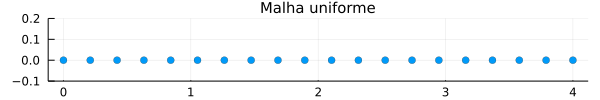

In [2]:
N = 20
L = 4
x = range(0.0, L, length=N)
scatter(x, zero(x), markersize=4, legend=false)
plot!(title="Malha uniforme", titlefont=10, size=(600,100), ylims=(-0.1, 0.2))

### Discretização unidimensional não-uniforme

* A discretização não precisa ser uniforme.

* Podemos considerar qualquer malha satisfazendo $0=x_1<x_2<\ldots<x_N=L$.

* Pode ser útil, por exemplo, ter um espaçamento menor em regiões onde a derivada tem uma variação maior.

* Podemos construir malhas não-uniformes com simples transformações.

* Por exemplo, considerando $s_i = (i-1)h$, $i=1, \ldots, N$, com $h>0$ constante e $(N-1)h=1$, que é uma malha uniforme no intervalo unitário $[0,1]$, podemos definir
$$ x_i = \frac{L}{2}\left( 1 + \cos(\pi s_i)\right), \qquad i=1,\ldots, N.
$$

* Mais explicitamente,
$$ x_i = \frac{L}{2}\left( 1 + \cos\left({\frac {2i-1}{2N}}\pi \right)\right), \qquad i=1,\ldots, N.
$$

* Esses pontos são conhecidos como pontos de Chebyshev e podem ser interpretados como as coordenadas, no eixo $x$, de pontos uniformemente espaçados no semicírculo superior de um círculo de diâmetro $L$.

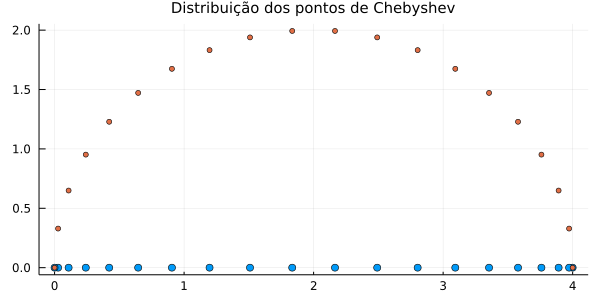

In [3]:
N = 20
L = 4
s = range(0.0, 1.0, length=N)
x = L/2 * (1 .+ cos.(π * s))
#x = L/2 * ( 1 .+ [cos((2i - 1)/(2N) * π) for i in 1:N])
scatter(x, zero(x), markersize=4, legend=false)
scatter!(x,x->√((L/2)^2-(x-L/2)^2), markersize=3, legend=false)
plot!(title="Distribuição dos pontos de Chebyshev", titlefont=10, size=(600,300))

### Discretização espacial bidimensional uniforme

* Essa ideia pode ser estendida a dimensões maiores de forma natural.

* No caso de um domínio bidimensional retangular $\Omega = (0,L_x) \times (0,L_y)$, considerando espaçamentos uniformes $h_x$ e $h_y$, com $N_x$ pontos no eixo $x$ e $N_y$ pontos no eixo $y$, temos
$$ 0 = x_1 < \ldots < x_{N_x} = L_x, \quad (N_x-1)h_x = L_x, \qquad 0 = y_1 < \ldots < y_{N_y} = L_y, \quad (N_y-1)h_y = L_y
$$

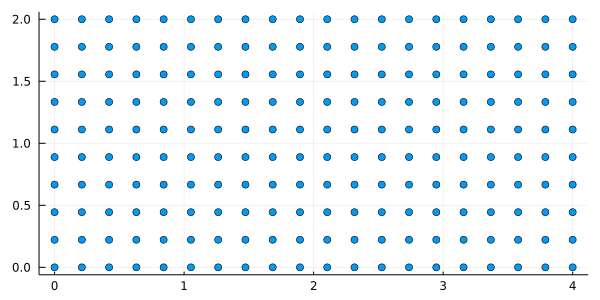

In [4]:
L_x = 4.0
L_y = 2.0
N_x = 20
N_y = 10
x = range(0.0, L_x, length=N_x)
y = range(0.0, L_y, length=N_y)
scatter(x, repeat(y',length(x)), legend=false, color=1, size=(600,300))

### Discretização bidimensional não-uniforme

* Da mesma forma, podemos considerar malhas não-uniformes

* A malha pode ser não-uniforme na direção de ambos os eixos ou em apenas um deles

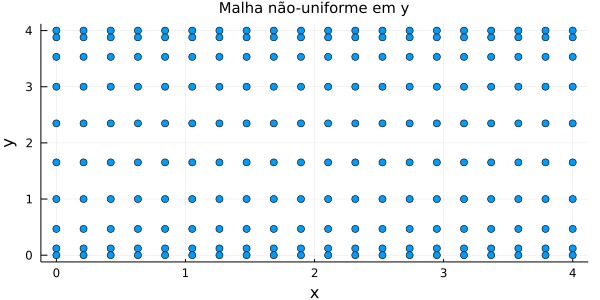

In [5]:
L_x = 4.0
L_y = 2.0
N_x = 20
N_y = 10
x = range(0.0, L_x, length=N_x)
s = range(0.0, 1.0, length=N_y)
y = L/2 * (1 .+ cos.(π * s))
scatter(x, repeat(y',length(x)), legend=false, color=1, size=(600,300),
    xlabel="x", ylabel="y", title="Malha não-uniforme em y", titlefont=10)

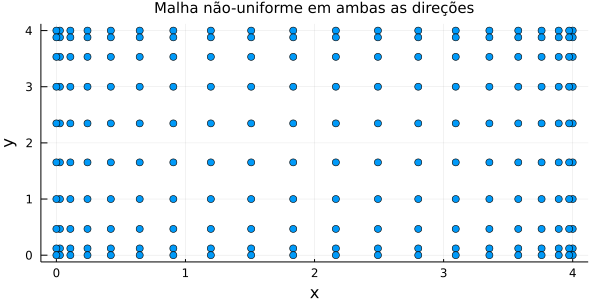

In [6]:
L_x = 4.0
L_y = 2.0
N_x = 20
N_y = 10
r = range(0.0, 1.0, length=N_x)
s = range(0.0, 1.0, length=N_y)
x = L/2 * (1 .+ cos.(π * r))
y = L/2 * (1 .+ cos.(π * s))
scatter(x, repeat(y',length(x)), legend=false, color=1, size=(600,300),
    xlabel="x", ylabel="y", title="Malha não-uniforme em ambas as direções", titlefont=10)

## Resolvendo EDPs em Julia

* O artigo [Solving PDEs in Julia (JuliaCon 2018 workshop), por Chris Rackauckas](https://nextjournal.com/sosiris-de/pde-2018) dá uma boa ideia de métodos e exemplos de resolução de EDPs em Julia.

* O artigo está um pouco desatualizado, pois é de 2018 e a linguagem e, principalmente, os pacotes de resolução de equações diferenciais têm evoluido muito rapidamente.

* Mas ainda assim o artigo pode ser útil.

* Um novo artigo, com o mesmo espírito desse, deve ser escrito após novas atualizaçõe planejadas para o meio do ano, no [Google Summer of Code](https://summerofcode.withgoogle.com/organizations/6684087328178176/).

<!--NAVIGATOR-->

---
[<- 21. Modelos compartimentais estruturados](21.00-Compartimentais_estruturados.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [23. Equação de adveçcão ->](23.00-EDP_advecao.ipynb)